<a href="https://colab.research.google.com/github/SeifAmr1/Nairobi-Traffic-Analysis-Project/blob/main/Final_e%26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the data
train_df = pd.read_csv("/content/train_revised.csv")
test_df = pd.read_csv("/content/test_questions.csv")

print(train_df.head())
print(train_df.info())



   ride_id seat_number payment_method payment_receipt travel_date travel_time  \
0     1442         15A          Mpesa      UZUEHCBUSO    17-10-17        7:15   
1     5437         14A          Mpesa      TIHLBUSGTE    19-11-17        7:12   
2     5710          8B          Mpesa      EQX8Q5G19O    26-11-17        7:05   
3     5777         19A          Mpesa      SGP18CL0ME    27-11-17        7:10   
4     5778         11A          Mpesa      BM97HFRGL9    27-11-17        7:12   

  travel_from travel_to car_type  max_capacity  
0      Migori   Nairobi      Bus            49  
1      Migori   Nairobi      Bus            49  
2      Keroka   Nairobi      Bus            49  
3    Homa Bay   Nairobi      Bus            49  
4      Migori   Nairobi      Bus            49  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id        

In [ ]:
number_of_ticket = train_df.groupby('ride_id').size().reset_index(name='number_of_ticket')



In [ ]:
train_df=train_df.merge(number_of_ticket,on='ride_id',how='left')
train_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [ ]:
import numpy as np

# Convert travel_date to datetime format
train_df['travel_date'] = pd.to_datetime(train_df['travel_date'])
test_df['travel_date'] = pd.to_datetime(test_df['travel_date'])

# Extract day of the week, month, and time of day
train_df['day_of_week'] = train_df['travel_date'].dt.dayofweek
test_df['day_of_week'] = test_df['travel_date'].dt.dayofweek


train_df["travel_day"] = train_df["travel_date"].dt.dayofyear
test_df["travel_day"] = test_df["travel_date"].dt.dayofyear

# Convert travel_time to hour
train_df['travel_hour'] = pd.to_datetime(train_df['travel_time'], format='%H:%M').dt.hour
test_df['travel_hour'] = pd.to_datetime(test_df['travel_time'], format='%H:%M').dt.hour



tickets_per_hour = train_df.groupby('travel_hour')['payment_receipt'].count()

# Print the number of tickets sold in each hour
print(tickets_per_hour)
train_df.head()


travel_hour
5      1515
6      2438
7     29205
8      4709
9      3692
10     4605
11      620
19     4369
23      492
Name: payment_receipt, dtype: int64


<ipython-input-27-e7f29e4f7873>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['travel_date'] = pd.to_datetime(train_df['travel_date'])


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,day_of_week,travel_day,travel_hour
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,1,1,290,7
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,1,6,323,7
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,1,6,330,7
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,5,0,331,7
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,31,0,331,7


In [ ]:
import pandas as pd
from prophet import Prophet

# Example: Create a DataFrame with daily ticket sales data
# Assume df is your original DataFrame with 'travel_date' and 'number_of_ticket' columns

df_daily = train_df.groupby('travel_date')['number_of_ticket'].sum().reset_index()
df_daily.columns = ['ds', 'y']  # Rename columns to fit Prophet's requirements

# # Convert the date column to datetime if it's not already
# df_daily['ds'] = pd.to_datetime(df_daily['ds'])

# Display the first few rows of the data
print(df_daily.head())


          ds     y
0 2017-01-12  3900
1 2017-02-12   723
2 2017-03-12  1182
3 2017-04-12  4494
4 2017-05-12  6950


In [ ]:
#train model
model = Prophet(
    changepoint_prior_scale=0.1,
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True
)

# Fit the model with the daily data
model.fit(df_daily)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpoh051t7b/elf4jrsx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoh051t7b/axv4rlvn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62528', 'data', 'file=/tmp/tmpoh051t7b/elf4jrsx.json', 'init=/tmp/tmpoh051t7b/axv4rlvn.json', 'output', 'file=/tmp/tmpoh051t7b/prophet_modeldy_3shj4/prophet_model-20240829083652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:36:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:36:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a DataFrame to hold future dates for which predictions are needed
future = model.make_future_dataframe(periods=14)  # For the next 30 days

# Make predictions
forecast = model.predict(future)

# Display the predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


            ds         yhat   yhat_lower    yhat_upper
158 2018-12-14  8172.700319  4348.177803  11996.706290
159 2018-12-15  7286.773447  3596.877422  10980.866626
160 2018-12-16  6803.455624  2988.947446  10366.540107
161 2018-12-17  7727.590377  3928.095293  11306.943589
162 2018-12-18  7345.524495  3507.186168  11152.775666


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



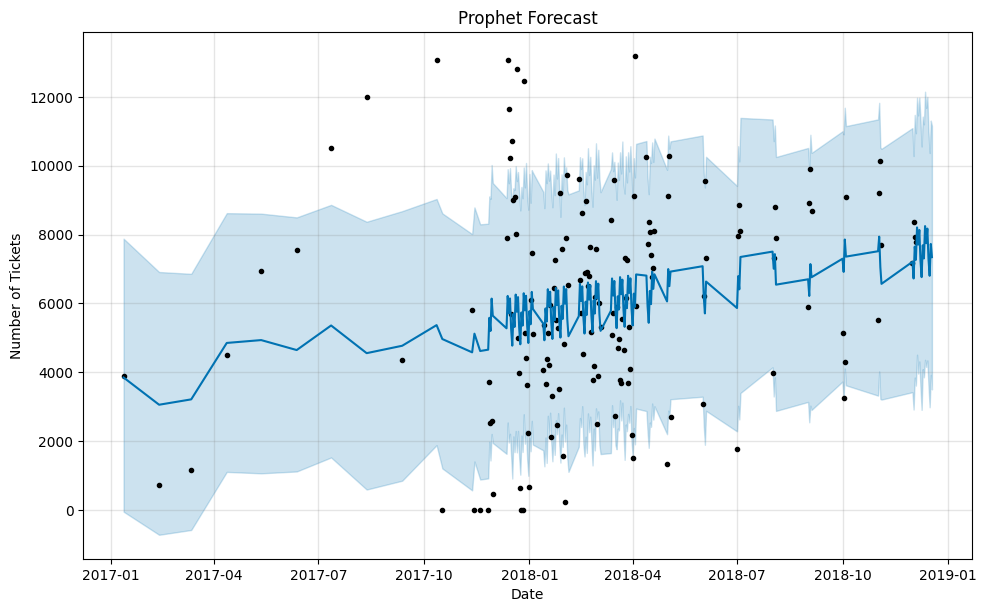

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:401: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



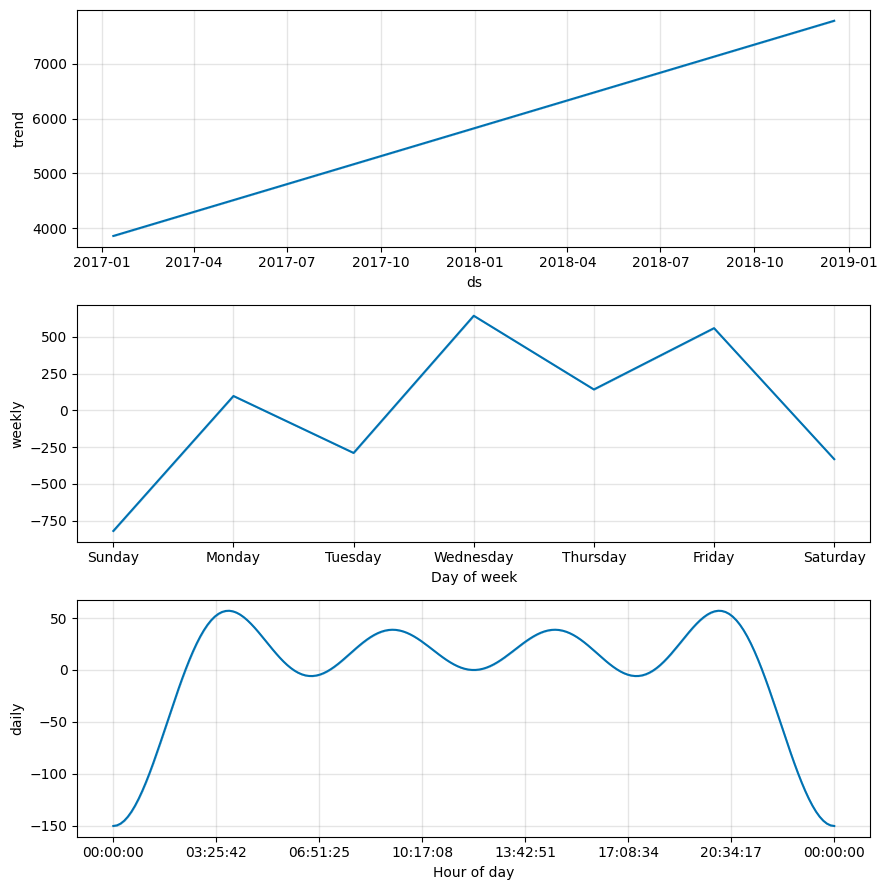

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt



fig_forecast = plot_plotly(model, forecast)
fig_forecast.show()

# Alternatively, using matplotlib for a static plot
fig1 = model.plot(forecast)
plt.title("Prophet Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Tickets")
plt.show()

# 2. Plot Forecast Components

# Using Plotly for interactive plot
fig_components = plot_components_plotly(model, forecast)
fig_components.show()

# Alternatively, using matplotlib for a static plot
fig2 = model.plot_components(forecast)
plt.show()



In [ ]:
train_df["travel_time"] = train_df["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))



AttributeError: Can only use .str accessor with string values!

In [ ]:
test_df["travel_time"] = test_df["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [ ]:
# Define rush hours based on high ticket sales
rush_hours = [7, 8, 10, 19]  # Example rush hours based on your data

# Create a rush hour feature
train_df['rush_hour'] = train_df['travel_hour'].isin(rush_hours).astype(int)
test_df['rush_hour'] = test_df['travel_hour'].isin(rush_hours).astype(int)


In [ ]:
 train_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,day_of_week,travel_day,travel_hour,rush_hour
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,435,Migori,Nairobi,Bus,49,1,1,290,7,1
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,432,Migori,Nairobi,Bus,49,1,6,323,7,1
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,425,Keroka,Nairobi,Bus,49,1,6,330,7,1
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,430,Homa Bay,Nairobi,Bus,49,5,0,331,7,1
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,432,Migori,Nairobi,Bus,49,31,0,331,7,1


In [ ]:

# Define demand levels based on ticket sales
def get_demand_level(hour):
    if hour in [5, 11, 23]:
        return 1
    elif hour in [6, 9, 10, 19]:
        return 2
    elif hour in [7, 8]:
        return 3
    else:
        return 0  # For hours not present in your data


# Apply the mapping to create a new encoded column
train_df['demand_level_encoded'] = train_df['travel_hour'].apply(get_demand_level)
test_df['demand_level_encoded'] = test_df['travel_hour'].apply(get_demand_level)


train_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,day_of_week,travel_day,travel_hour,rush_hour,demand_level_encoded
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,435,Migori,Nairobi,Bus,49,1,1,290,7,1,3
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,432,Migori,Nairobi,Bus,49,1,6,323,7,1,3
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,425,Keroka,Nairobi,Bus,49,1,6,330,7,1,3
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,430,Homa Bay,Nairobi,Bus,49,5,0,331,7,1,3
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,432,Migori,Nairobi,Bus,49,31,0,331,7,1,3


In [ ]:
test_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,travel_day,travel_hour,rush_hour,demand_level_encoded
0,247,2018-05-07,426,Kisii,Nairobi,Bus,49,0,127,7,1,3
1,256,2018-05-06,668,Kisii,Nairobi,shuttle,11,6,126,11,0,1
2,275,2018-05-04,300,Kisii,Nairobi,shuttle,11,4,124,5,0,1
3,285,2018-05-04,550,Kisii,Nairobi,shuttle,11,4,124,9,0,2
4,286,2018-05-04,560,Kisii,Nairobi,shuttle,11,4,124,9,0,2


In [ ]:
# tcount = dict(train_df["travel_day"].value_counts())
# train_df["daily_travelers"] = np.log1p(train_df["travel_day"].map(tcount))
# te_count = dict(test_df["travel_day"].value_counts())
# test_df["daily_travelers"] = np.log1p(test_df["travel_day"].map(te_count))
# train_df.head()
# test_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,day_of_week,travel_day,travel_hour,rush_hour,demand_level_encoded,hourly_ticket_sales,daily_travelers
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,0,127,7,1,3,10.282129,1.945910
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,6,126,11,0,1,6.431331,2.564949
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11,4,124,5,0,1,7.323831,4.094345
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11,4,124,9,0,2,8.214194,4.094345
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11,4,124,9,0,2,8.214194,4.094345


# Drop unimportant features

In [ ]:
test_copy = test_df.copy()
df_copy = train_df.copy()
df_copy

df_copy.drop(['travel_to', 'travel_date', 'payment_receipt', 'payment_method', 'seat_number'], axis=1, inplace=True)
test_copy.drop(['travel_to', 'travel_date'], axis=1, inplace=True)

df_copy.head()



,ride_id,travel_time,travel_from,car_type,max_capacity,number_of_ticket,day_of_week,travel_day,travel_hour,rush_hour,demand_level_encoded
0,1442,435,Migori,Bus,49,1,1,290,7,1,3
1,5437,432,Migori,Bus,49,1,6,323,7,1,3
2,5710,425,Keroka,Bus,49,1,6,330,7,1,3
3,5777,430,Homa Bay,Bus,49,5,0,331,7,1,3
4,5778,432,Migori,Bus,49,31,0,331,7,1,3


In [ ]:
from sklearn.preprocessing import LabelEncoder



label_encoder=LabelEncoder()
df_copy['travel_from']=label_encoder.fit_transform(df_copy['travel_from'])

test_copy['travel_from']=label_encoder.fit_transform(test_copy['travel_from'])


# ohe=OneHotEncoder()
# df_copy['car_type']=ohe.fit_transform(df_copy[['car_type']]).toarray()

df_copy.head()
df_copy.info()
test_copy.head()
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ride_id               51645 non-null  int64 
 1   travel_time           51645 non-null  int64 
 2   travel_from           51645 non-null  int64 
 3   car_type              51645 non-null  object
 4   max_capacity          51645 non-null  int64 
 5   number_of_ticket      51645 non-null  int64 
 6   day_of_week           51645 non-null  int32 
 7   travel_day            51645 non-null  int32 
 8   travel_hour           51645 non-null  int32 
 9   rush_hour             51645 non-null  int64 
 10  demand_level_encoded  51645 non-null  int64 
dtypes: int32(3), int64(7), object(1)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------             

In [ ]:
import pandas as pd


# Mapping car_type to 0 and 1
df_copy['car_type'] = df_copy['car_type'].map({'shuttle': 0, 'Bus': 1})

# Display the modified dataframe
print(f"Encoded car_type data:\n{df_copy}")


Encoded car_type data:
       ride_id  travel_time  travel_from  car_type  max_capacity  \
0         1442          435            9         1            49   
1         5437          432            9         1            49   
2         5710          425            4         1            49   
3         5777          430            1         1            49   
4         5778          432            9         1            49   
...        ...          ...          ...       ...           ...   
51640    13826          480            0         1            49   
51641    13809          480            9         1            49   
51642    13809          480            9         1            49   
51643    13796          428            0         1            49   
51644    14304          310            7         1            49   

       number_of_ticket  day_of_week  travel_day  travel_hour  rush_hour  \
0                     1            1         290            7          1   
1       

In [ ]:
import pandas as pd


# Mapping car_type to 0 and 1
test_copy['car_type'] = test_copy['car_type'].map({'shuttle': 0, 'Bus': 1})

# Display the modified dataframe
print(f"Encoded car_type data:\n{test_copy}")


Encoded car_type data:
      ride_id  travel_time  travel_from  car_type  max_capacity  day_of_week  \
0         247          426            5         1            49            0   
1         256          668            5         0            11            6   
2         275          300            5         0            11            4   
3         285          550            5         0            11            4   
4         286          560            5         0            11            4   
...       ...          ...          ...       ...           ...          ...   
1106    15336          421           10         1            49            0   
1107    15337          428            2         1            49            0   
1108    15338          424           12         1            49            0   
1109    15339          425            8         1            49            0   
1110    15344          480            7         1            49            2   

      travel_day

In [ ]:
df_ready = df_copy.copy()
test_ready = test_copy.copy()
df_ready.drop(['max_capacity', 'ride_id', 'travel_hour'], axis=1, inplace=True)
test_ready.drop(['max_capacity', 'ride_id', 'travel_hour'], axis=1, inplace=True)

df_ready.head()
test_ready.head()

,travel_time,travel_from,car_type,day_of_week,travel_day,rush_hour,demand_level_encoded
0,426,5,1,0,127,1,3
1,668,5,0,6,126,0,1
2,300,5,0,4,124,0,1
3,550,5,0,4,124,0,2
4,560,5,0,4,124,0,2


In [ ]:
df_ready.head()


,travel_time,travel_from,car_type,number_of_ticket,day_of_week,travel_day,travel_hour,rush_hour,demand_level_encoded
0,435,9,1,1,1,290,7,1,3
1,432,9,1,1,6,323,7,1,3
2,425,4,1,1,6,330,7,1,3
3,430,1,1,5,0,331,7,1,3
4,432,9,1,31,0,331,7,1,3


In [ ]:
test_ready.head()

,travel_time,travel_from,car_type,day_of_week,travel_day,travel_hour,rush_hour,demand_level_encoded
0,426,5,1,0,127,7,1,3
1,668,5,0,6,126,11,0,1
2,300,5,0,4,124,5,0,1
3,550,5,0,4,124,9,0,2
4,560,5,0,4,124,9,0,2


In [ ]:
from sklearn.decomposition import PCA

# Select only the highly correlated features
correlated_features = ['demand_level_encoded', 'rush_hour']

# Fit PCA
pca = PCA(n_components=1)
df_ready['demand_rush_hour'] = pca.fit_transform(df_ready[correlated_features])


# Drop the original correlated features
df_ready.drop(correlated_features, axis=1, inplace=True)


In [ ]:
 test_ready['demand_rush_hour'] = pca.fit_transform(test_ready[correlated_features])
 test_ready.drop(correlated_features, axis=1, inplace=True)


In [ ]:
df_ready.head()

,travel_time,travel_from,car_type,number_of_ticket,day_of_week,travel_day,demand_rush_hour
0,435,9,1,1,1,290,-0.427341
1,432,9,1,1,6,323,-0.427341
2,425,4,1,1,6,330,-0.427341
3,430,1,1,5,0,331,-0.427341
4,432,9,1,31,0,331,-0.427341


Mean Absolute Error on Test Set: 0.5479020160891801
R-squared Score on Test Set: 0.9844025742333742
Feature: travel_time, Importance: 0.15671595630117224
Feature: travel_from, Importance: 0.26917611663555085
Feature: car_type, Importance: 0.27746583983976725
Feature: day_of_week, Importance: 0.06300810178440648
Feature: travel_day, Importance: 0.19793922519700705
Feature: demand_rush_hour, Importance: 0.03569476024209611


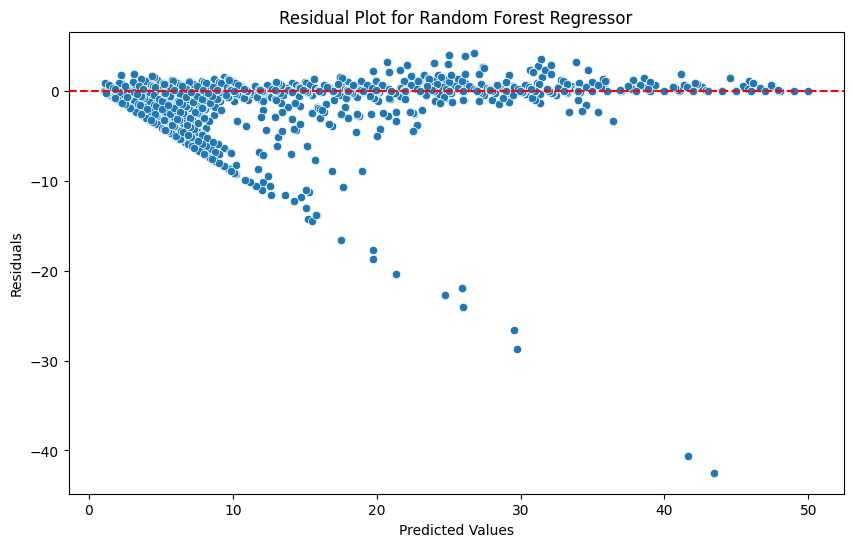

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# Assuming df_ready is your preprocessed DataFrame
# Define features and target
features = df_ready.drop(columns=['number_of_ticket'])  # Drop the target column from features
target = df_ready['number_of_ticket']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor with some chosen parameters

model = RandomForestRegressor(
    n_estimators=1000,
    random_state=42,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4
)


# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error on Test Set:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared Score on Test Set:", r2)

# Optional: Print feature importances
importances = model.feature_importances_
for feature, importance in zip(features.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate residuals                                                                                                                                           residuals = y_test - y_pred
residuals = y_test - y_pred
# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Predicted': y_pred, 'Residuals': residuals})

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted', y='Residuals', data=plot_df)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest Regressor')
plt.show()



In [ ]:
# prompt: apply radom forest on train_ready data

# Make predictions on the test data
test_predictions = model.predict(test_ready)

rounded_predictions = np.ceil(test_predictions)

# Create a submission DataFrame
submission_df = pd.DataFrame({'ride_id': test_df['ride_id'], 'number_of_ticket': rounded_predictions})

# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)

submission_df



,ride_id,number_of_ticket
0,247,3.0
1,256,3.0
2,275,2.0
3,285,2.0
4,286,2.0
...,...,...
1106,15336,12.0
1107,15337,12.0
1108,15338,3.0
1109,15339,6.0


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
rf_cv_mae = -rf_cv_scores.mean()

# # Cross-validation for XGBoost
# xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
# xgb_cv_mae = -xgb_cv_scores.mean()

print("\nRandom Forest Cross-Validated MAE:")
print(f"Mean Absolute Error: {rf_cv_mae}")

# print("\nXGBoost Cross-Validated MAE:")
# print(f"Mean Absolute Error: {xgb_cv_mae}")



Random Forest Cross-Validated MAE:
Mean Absolute Error: 0.6211266778158089


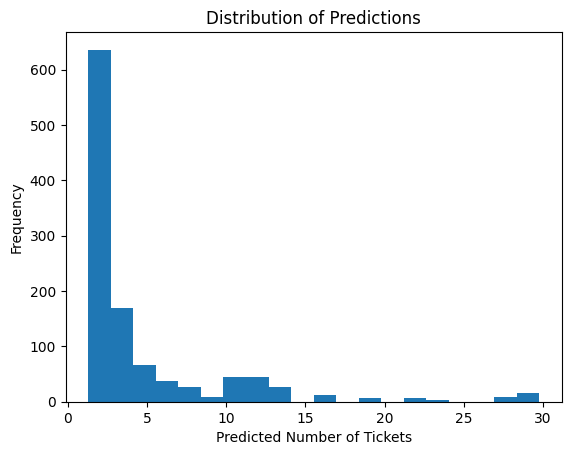

In [ ]:
# prompt: i want to check the distribution of the predictions to check if the model is performing well or not

import matplotlib.pyplot as plt

# Visualize the distribution of predictions
plt.hist(test_predictions, bins=20)
plt.xlabel("Predicted Number of Tickets")
plt.ylabel("Frequency")
plt.title("Distribution of Predictions")
plt.show()


In [ ]:
import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
import seaborn as sns


X2 = df_ready.drop(columns=['number_of_ticket'])  # Drop the target column from features
y2 = df_ready['number_of_ticket']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize the XGBRegressor
xgb_model = xgb.XGBRegressor()

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=10,
    alpha=5,
    n_estimators=1000
)

xgb_model.fit(X2_train, y2_train)

# Make predictions with the trained model
y2_pred = xgb_model.predict(X2_test)

# Calculate Mean Absolute Error
mae2 = mean_absolute_error(y2_test, y2_pred)
print("Mean Absolute Error on Test Set:", mae2)

# Calculate R-squared
r2_2 = r2_score(y2_test, y2_pred)
print("R-squared Score on Test Set:"), r2_2

Mean Absolute Error on Test Set: 4.9898908058007745
R-squared Score on Test Set:


(None, 0.6895494789872323)

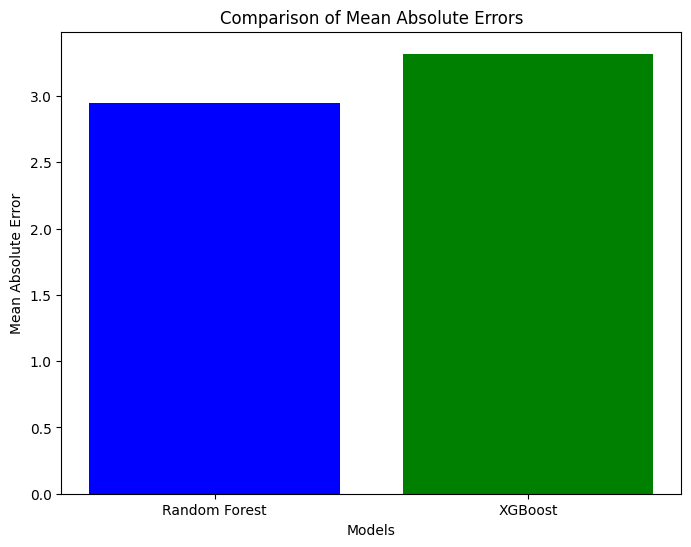

In [ ]:
# prompt: i want to plot a graph that compares the mean absolute errors between the two models

import matplotlib.pyplot as plt

# MAE values for the two models
mae_random_forest = mae  # From previous code
mae_xgboost = mae2      # From previous code

# Model names
models = ['Random Forest', 'XGBoost']
mae_values = [mae_random_forest, mae_xgboost]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, mae_values, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Mean Absolute Errors')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Calculate the correlation matrix
correlation_matrix = df_ready.corr()

# Display the correlation matrix
print(correlation_matrix)


                  travel_time  travel_from  car_type  number_of_ticket  \
travel_time          1.000000     0.378596  0.056820          0.270960   
travel_from          0.378596     1.000000  0.095019          0.111365   
car_type             0.056820     0.095019  1.000000          0.524234   
number_of_ticket     0.270960     0.111365  0.524234          1.000000   
day_of_week          0.017541    -0.005136  0.056270          0.017393   
travel_day          -0.013070    -0.038220 -0.081411          0.006662   
demand_rush_hour     0.391206     0.131410 -0.496427         -0.199061   

                  day_of_week  travel_day  demand_rush_hour  
travel_time          0.017541   -0.013070          0.391206  
travel_from         -0.005136   -0.038220          0.131410  
car_type             0.056270   -0.081411         -0.496427  
number_of_ticket     0.017393    0.006662         -0.199061  
day_of_week          1.000000    0.037999         -0.028296  
travel_day           0.037999    1.

In [ ]:
import pandas as pd

# Calculate the correlation of each feature with the target variable
correlation_with_target = df_ready.corr()['number_of_ticket'].sort_values(ascending=False)

# Display the correlations
print(correlation_with_target)


number_of_ticket    1.000000
car_type            0.524234
travel_time         0.270960
travel_from         0.111365
day_of_week         0.017393
travel_day          0.006662
demand_rush_hour   -0.199061
Name: number_of_ticket, dtype: float64


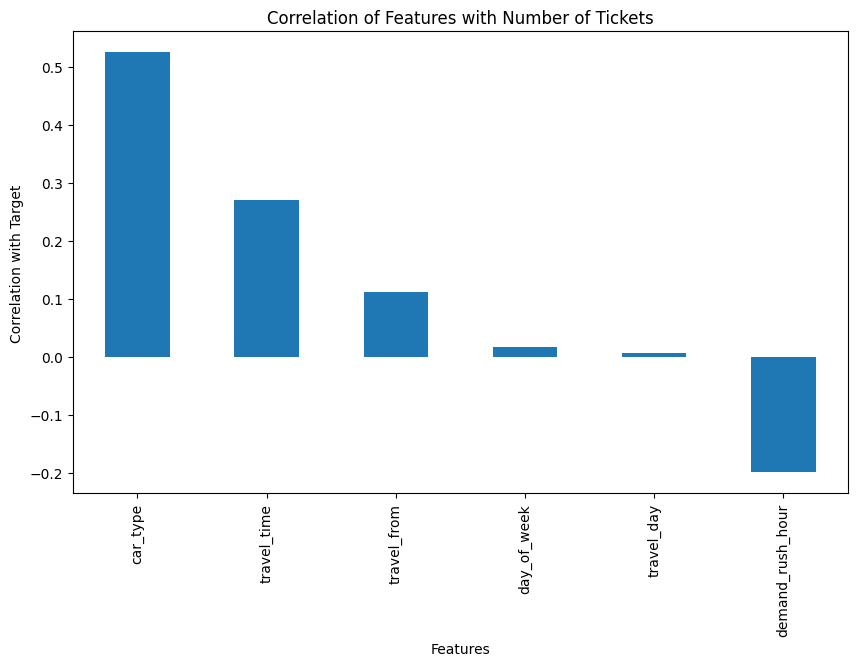

In [ ]:
# prompt: i want to plot the correlation above  in bar chart

# Plotting the correlation with the target variable in a bar chart
plt.figure(figsize=(10, 6))
correlation_with_target.drop('number_of_ticket').plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Correlation of Features with Number of Tickets')
plt.show()


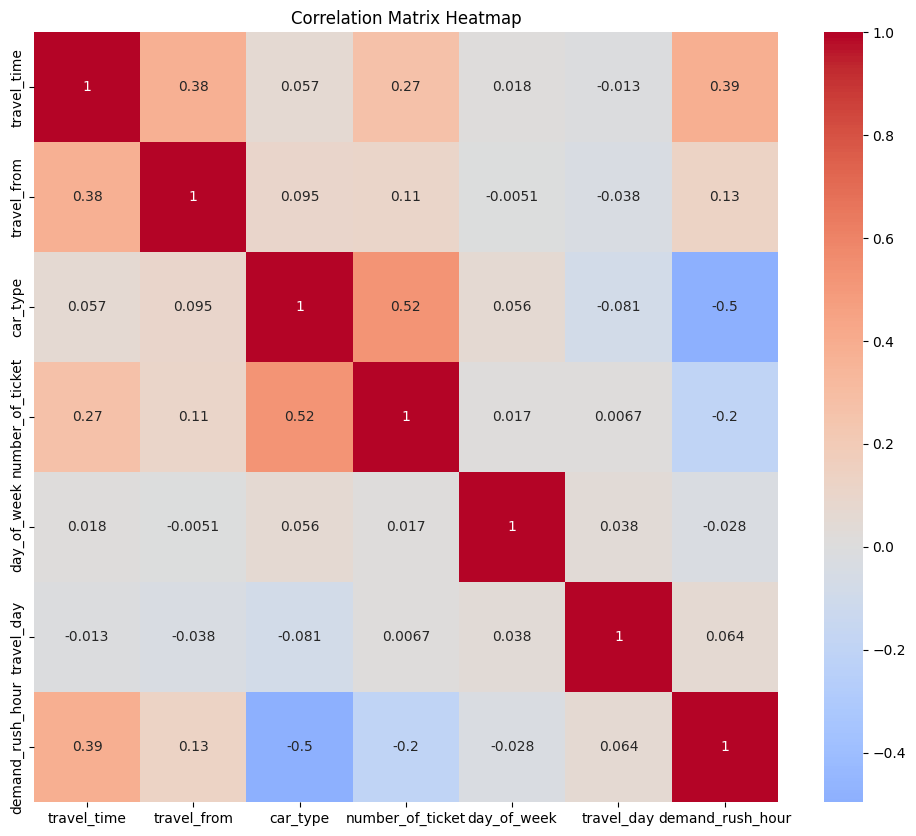

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Add title
plt.title("Correlation Matrix Heatmap")
plt.show()
